# Decision Tree Regressor

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
from setting_features import *

In [4]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

A **decision tree** is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization.

**Information gain** is the basic criterion to decide whether a feature should be used to split a node or not. Basically we choose the feature which makes more **information gain**.

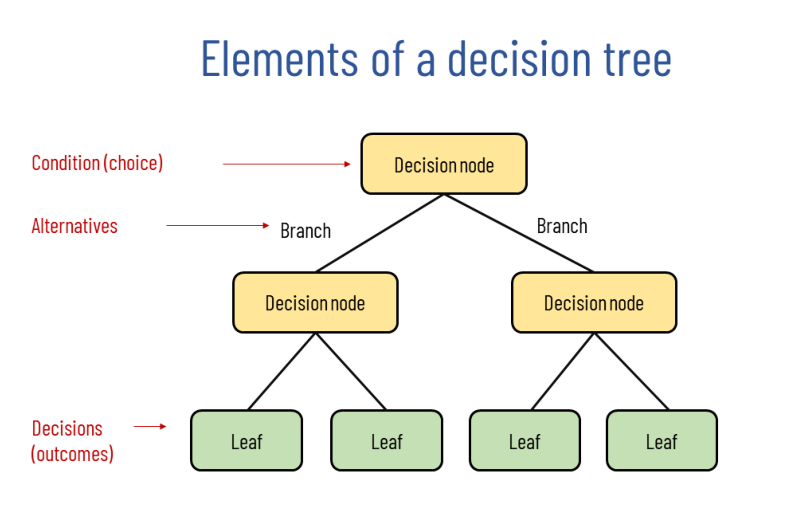

In [5]:
display_img('Elements.webp', 10, 10)

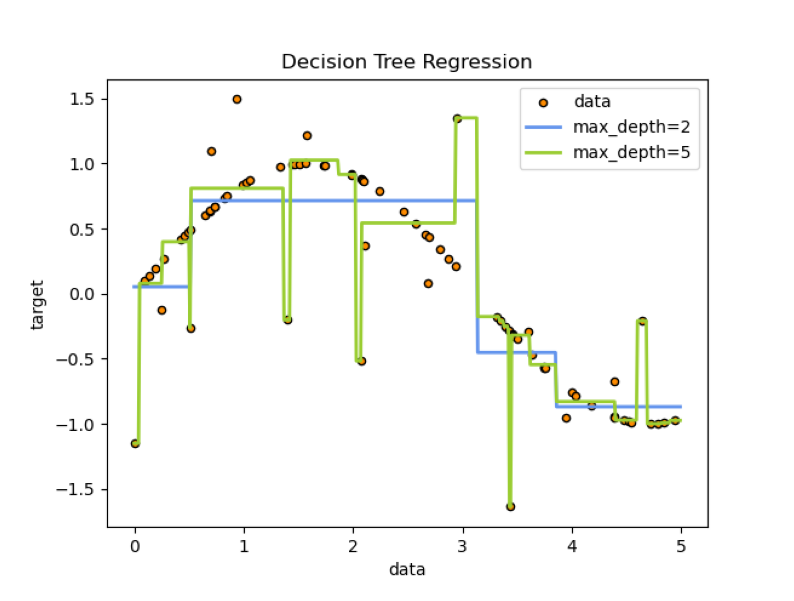

In [6]:
display_img('Decision_Tree.png', 10, 10)

**Considerations:**

- The trees aren't sensitive to scaling.

In [7]:
start = time.time()

# 1. Preprocessing

### i. Read Dataframe

In [8]:
df = pd.read_csv('Life Expectancy Data.csv')

In [9]:
X_cols = var_dict['cat_oh'] + var_dict['num_mean']
y_col = ['Life expectancy ']

### ii. Drop 'y' NaNs

In [10]:
df = df[df[y_col[0]].notna()]

### iii. Split

In [11]:
# External

ctr_test_hor_ext = ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Peru', 'Uruguay']

ctr_test_ver_ext = ['Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Venezuela (Bolivarian Republic of)']

# Internal

ctr_test_hor_int = ['Dominica', 'Mauritius', 'Netherlands', 'Armenia', 'Kazakhstan', 'Russian Federation', 'Ukraine', 'Bangladesh', 'India', 'Somalia']

ctr_test_ver_int = ['Afghanistan', 'New Zealand', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines']

# Validation

ctr_val_hor = ['Albania', 'Qatar', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Poland', 'Portugal', 'Republic of Korea', 'Senegal', 'Republic of Moldova', 
               'Romania', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Morocco', 'Montenegro']

ctr_val_ver = ['Algeria', 'Luxembourg', 'Sierra Leone', 'Seychelles', 'Serbia', 'Saudi Arabia', 'Mongolia', 'Micronesia (Federated States of)', 'Mexico',
               'Mauritania', 'Malta', 'Mali', 'Maldives', 'Malaysia', 'Malawi', 'Madagascar', 'Lithuania', 'Slovakia', 'Libya', 'Liberia']

# All validation and test countries

all_ctr = ctr_test_hor_ext + ctr_test_ver_ext + ctr_test_hor_int + ctr_test_ver_int + ctr_val_hor + ctr_val_ver 

In [12]:
# External

df_test_hor_ext = df[(df['Country'].isin(ctr_test_hor_ext)) & (df['Year'] != 2015)]
df_test_ver_ext = df[(df['Country'].isin(ctr_test_ver_ext)) & (df['Year'] == 2015)]

# Internal

df_test_hor_int = df[(df['Country'].isin(ctr_test_hor_int)) & (df['Year'] != 2015)]
df_test_ver_int = df[(df['Country'].isin(ctr_test_ver_int)) & (df['Year'] == 2015)]

# Validation

df_val_hor = df[(df['Country'].isin(ctr_val_hor)) & (df['Year'] != 2015) & (df['Year'] != 2014)]
df_val_ver = df[(df['Country'].isin(ctr_val_ver)) & (df['Year'] == 2014)]

# Train

df_train = df[(~df['Country'].isin(all_ctr)) & (df['Year'] != 2015) & (df['Year'] != 2014)]

In [13]:
# External

X_test_hor_ext = df_test_hor_ext[X_cols]
y_test_hor_ext = df_test_hor_ext[y_col]

X_test_ver_ext = df_test_ver_ext[X_cols]
y_test_ver_ext = df_test_ver_ext[y_col]

# Internal

X_test_hor_int = df_test_hor_int[X_cols]
y_test_hor_int = df_test_hor_int[y_col]

X_test_ver_int = df_test_ver_int[X_cols]
y_test_ver_int = df_test_ver_int[y_col]

# Validation

X_val_hor = df_val_hor[X_cols]
y_val_hor = df_val_hor[y_col]

X_val_ver = df_val_ver[X_cols]
y_val_ver = df_val_ver[y_col]

# Train

X_train = df_train[X_cols]
y_train = df_train[y_col]

### iv. Fit preprocess

In [14]:
from preprocessing import *

In [15]:
transformers_fit = get_fit_transformers(var_dict, X_train)

In [16]:
# Train

y_train = y_train.reset_index()
y_train = y_train.drop(columns = ['index'])

# Validation

y_val_hor = y_val_hor.reset_index()
y_val_hor = y_val_hor.drop(columns = ['index'])

y_val_ver = y_val_ver.reset_index()
y_val_ver = y_val_ver.drop(columns = ['index'])

# Test

y_test_hor_int = y_test_hor_int.reset_index()
y_test_hor_int = y_test_hor_int.drop(columns = ['index'])

y_test_ver_int = y_test_ver_int.reset_index()
y_test_ver_int = y_test_ver_int.drop(columns = ['index'])

y_test_hor_ext = y_test_hor_ext.reset_index()
y_test_hor_ext = y_test_hor_ext.drop(columns = ['index'])

y_test_ver_ext = y_test_ver_ext.reset_index()
y_test_ver_ext = y_test_ver_ext.drop(columns = ['index'])

In [17]:
# Train

X_train = transform_datasets(transformers_fit, var_dict, X_train)

# Validation

X_val_hor = transform_datasets(transformers_fit, var_dict, X_val_hor)

X_val_ver = transform_datasets(transformers_fit, var_dict, X_val_ver)

# Test

X_test_hor_int = transform_datasets(transformers_fit, var_dict, X_test_hor_int)

X_test_ver_int = transform_datasets(transformers_fit, var_dict, X_test_ver_int)

X_test_hor_ext = transform_datasets(transformers_fit, var_dict, X_test_hor_ext)

X_test_ver_ext = transform_datasets(transformers_fit, var_dict, X_test_ver_ext)

### v. Train model (with Fine Tunning)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
M_depth_max = 10

In [20]:
M_depth = [j for j in range(1, M_depth_max + 1)]

In [21]:
all_mape_train = []
all_mape_val = []
all_params = []


for m_depth in M_depth:

    print('Max Depth: ', m_depth)

    reg = DecisionTreeRegressor(max_depth = m_depth, random_state = 0)

    reg = reg.fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    y_val_hor_pred = reg.predict(X_val_hor)
    y_val_ver_pred = reg.predict(X_val_ver)

    mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)
    mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)
    mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)
    mape_val = (mape_val_hor + mape_val_ver)/2

    all_mape_train.append(mape_train)
    all_mape_val.append(mape_val)
    all_params.append([m_depth])

    print('-'*70)
    
all_mape_train = np.array(all_mape_train)
all_mape_val = np.array(all_mape_val)
all_params = np.array(all_params)

Max Depth:  1
----------------------------------------------------------------------
Max Depth:  2
----------------------------------------------------------------------
Max Depth:  3
----------------------------------------------------------------------
Max Depth:  4
----------------------------------------------------------------------
Max Depth:  5
----------------------------------------------------------------------
Max Depth:  6
----------------------------------------------------------------------
Max Depth:  7
----------------------------------------------------------------------
Max Depth:  8
----------------------------------------------------------------------
Max Depth:  9
----------------------------------------------------------------------
Max Depth:  10
----------------------------------------------------------------------


In [22]:
mape_train_opt = all_mape_train[all_mape_val == all_mape_val.min()][0]
mape_val_opt = all_mape_val[all_mape_val == all_mape_val.min()][0]
M_depth_opt = all_params[all_mape_val == all_mape_val.min()][0][0]

In [23]:
print('Train MAPE:', mape_train_opt)
print('Val MAPE:', mape_val_opt)
print('M depth opt:', M_depth_opt)

Train MAPE: 2.6
Val MAPE: 3.84
M depth opt: 6


### vi. Train definitive model

In [24]:
reg = DecisionTreeRegressor(max_depth = M_depth_opt, random_state = 0)

In [25]:
reg = reg.fit(X_train, y_train)

### vii. Report of metrics

In [26]:
# Train

y_train_pred = reg.predict(X_train)
mape_train = round(abs((y_train_pred - y_train['Life expectancy '])/y_train['Life expectancy ']).mean()*100, 2)

# Validation

y_val_hor_pred = reg.predict(X_val_hor)
mape_val_hor = round(abs((y_val_hor_pred - y_val_hor['Life expectancy '])/y_val_hor['Life expectancy ']).mean()*100, 2)

y_val_ver_pred = reg.predict(X_val_ver)
mape_val_ver = round(abs((y_val_ver_pred - y_val_ver['Life expectancy '])/y_val_ver['Life expectancy ']).mean()*100, 2)

# Test 

y_test_hor_int_pred = reg.predict(X_test_hor_int)
mape_test_hor_int = round(abs((y_test_hor_int_pred - y_test_hor_int['Life expectancy '])/y_test_hor_int['Life expectancy ']).mean()*100, 2)

y_test_ver_int_pred = reg.predict(X_test_ver_int)
mape_test_ver_int = round(abs((y_test_ver_int_pred - y_test_ver_int['Life expectancy '])/y_test_ver_int['Life expectancy ']).mean()*100, 2)

y_test_hor_ext_pred = reg.predict(X_test_hor_ext)
mape_test_hor_ext = round(abs((y_test_hor_ext_pred - y_test_hor_ext['Life expectancy '])/y_test_hor_ext['Life expectancy ']).mean()*100, 2)

y_test_ver_ext_pred = reg.predict(X_test_ver_ext)
mape_test_ver_ext = round(abs((y_test_ver_ext_pred - y_test_ver_ext['Life expectancy '])/y_test_ver_ext['Life expectancy ']).mean()*100, 2)

In [27]:
print('Train')

print('\n')

print('MAPE Train:', mape_train)

print('\n')

print('-'*70)

print('Validation')

print('\n')

print('MAPE Val Hor:', mape_val_hor)
print('MAPE Val Ver:', mape_val_ver)

print('\n')

print('-'*70)

print('Test')

print('\n')

print('MAPE Test Hor Int:', mape_test_hor_int)
print('MAPE Test Ver Int:', mape_test_ver_int)
print('MAPE Test Hor Ext:', mape_test_hor_ext)
print('MAPE Test Ver Ext:', mape_test_ver_ext)

print('\n')

print('-'*70)

Train


MAPE Train: 2.6


----------------------------------------------------------------------
Validation


MAPE Val Hor: 3.86
MAPE Val Ver: 3.82


----------------------------------------------------------------------
Test


MAPE Test Hor Int: 6.46
MAPE Test Ver Int: 5.89
MAPE Test Hor Ext: 4.87
MAPE Test Ver Ext: 3.47


----------------------------------------------------------------------


### viii. Patterns

In [28]:
X_test_hor_int['pred'] = y_test_hor_int
X_test_ver_int['pred'] = y_test_ver_int
X_test_hor_ext['pred'] = y_test_hor_ext
X_test_ver_ext['pred'] = y_test_ver_ext

In [29]:
df_patt = pd.concat([X_test_hor_int, X_test_ver_int, X_test_hor_ext, X_test_ver_ext], axis = 0)
df_patt = df_patt.reset_index()
df_patt = df_patt.drop(columns = ['index'])

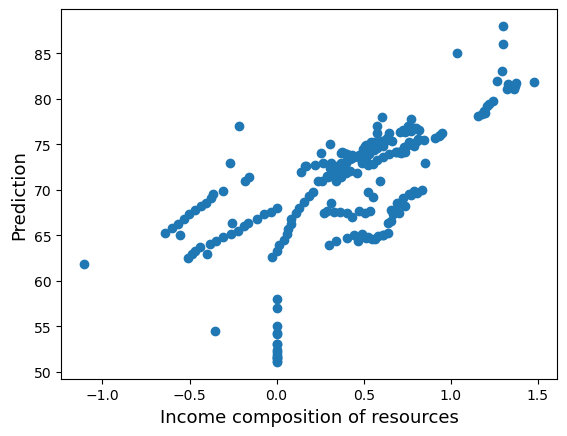

In [30]:
plt.scatter(df_patt['Income composition of resources'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Income composition of resources', fontsize = 13)
plt.show()

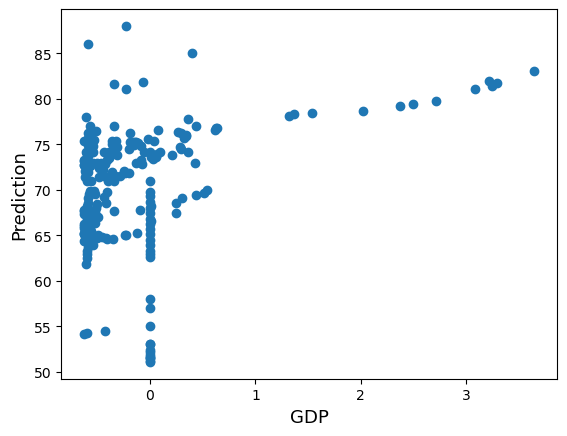

In [31]:
plt.scatter(df_patt['GDP'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('GDP', fontsize = 13)
plt.show()

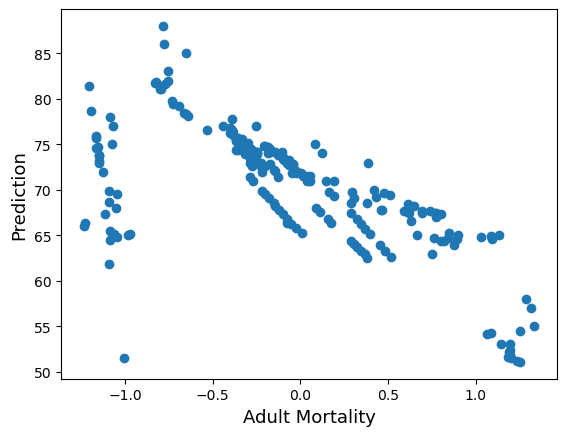

In [32]:
plt.scatter(df_patt['Adult Mortality'], df_patt['pred'])
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Adult Mortality', fontsize = 13)
plt.show()

### ix. Feature Importance

In [33]:
fi = pd.DataFrame(zip(reg.feature_names_in_, reg.feature_importances_))
fi = fi.rename(columns = {0: 'Variable', 1: 'Importance'})
fi['Importance'] = fi['Importance']*100

fi = fi.sort_values(by = ['Importance'], ascending = False)
fi = fi.reset_index()
fi = fi.drop(columns = ['index'])

In [34]:
fi

,Variable,Importance
0,HIV/AIDS,68.210635
1,Income composition of resources,18.928612
2,Adult Mortality,8.448095
3,Alcohol,1.510282
4,thinness 5-9 years,1.060566
5,BMI,1.002347
6,Diphtheria,0.309189
7,Year,0.272437
8,Population,0.102158
9,Measles,0.086722


### x. Explainability

In [35]:
import shap

In [36]:
explainer = shap.TreeExplainer(reg)

In [37]:
shap_values = explainer.shap_values(df_patt[X_train.columns])

In [38]:
df_shap_values = pd.DataFrame(shap_values)
df_shap_values.columns = X_train.columns

**Importance Variable**

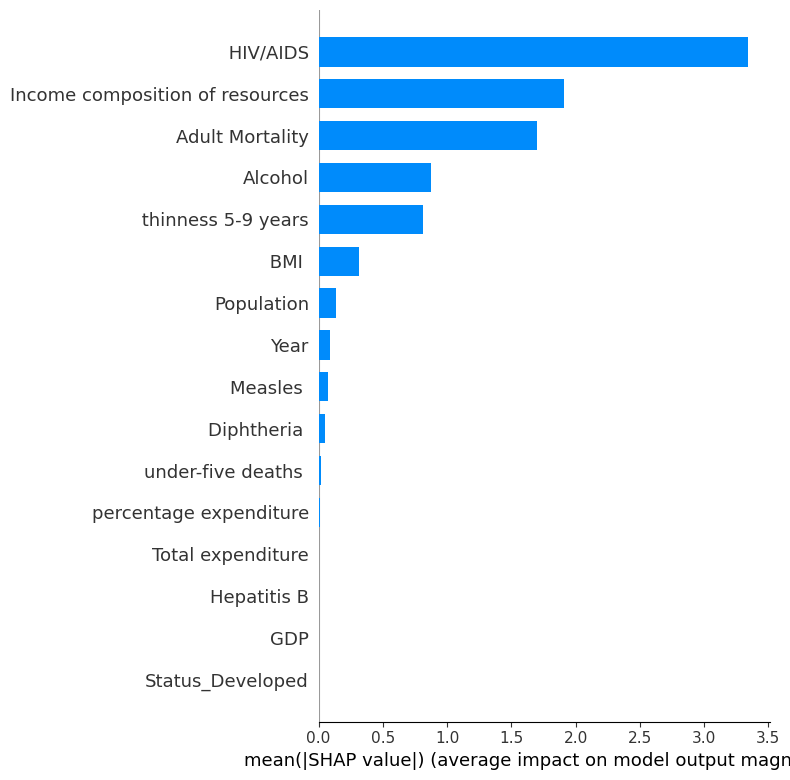

In [39]:
shap.summary_plot(shap_values, df_patt[X_train.columns], plot_type = "bar")

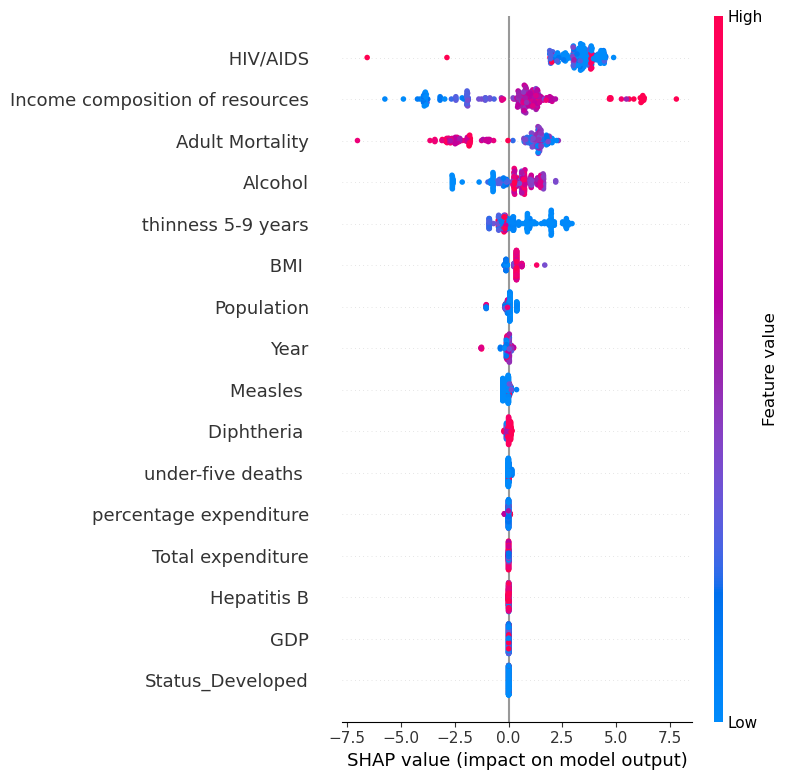

In [40]:
shap.summary_plot(shap_values, df_patt[X_train.columns])

In [41]:
df_shap_values['partial_sum_SHAP'] = df_shap_values.sum(axis = 1)

In [42]:
df_shap_values = df_shap_values[['partial_sum_SHAP']]

In [43]:
df_shap_values['pred_model'] = df_patt['pred']

**Sum of SHAP Values**

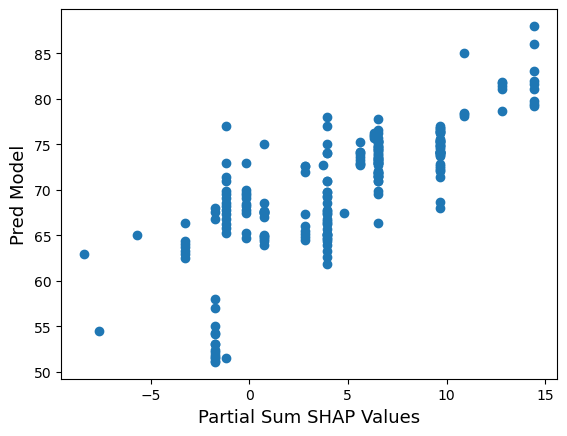

In [44]:
plt.scatter(df_shap_values['partial_sum_SHAP'], df_shap_values['pred_model'])
plt.xlabel('Partial Sum SHAP Values', fontsize = 13)
plt.ylabel('Pred Model', fontsize = 13)
plt.show()

**SHAP dependency**

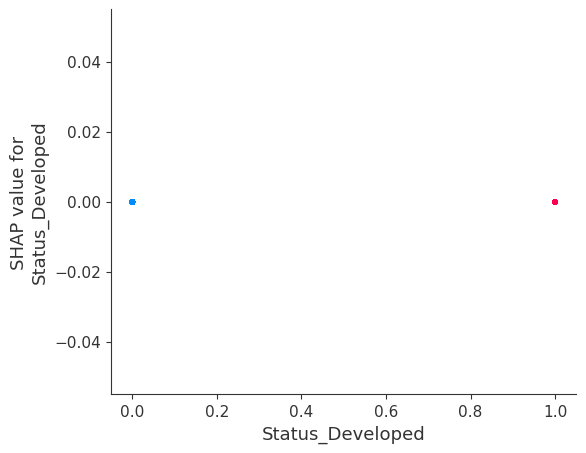

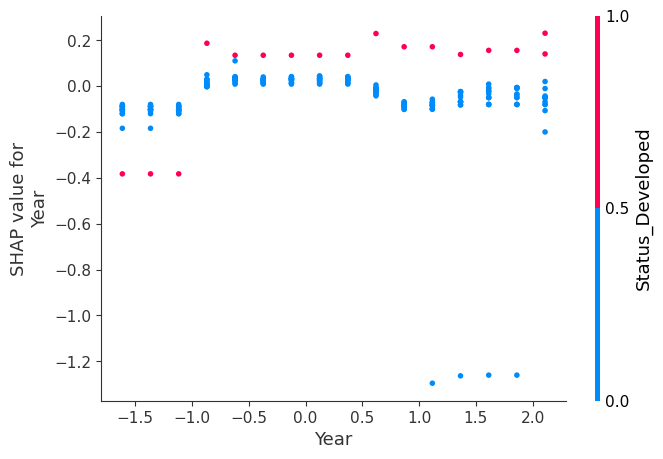

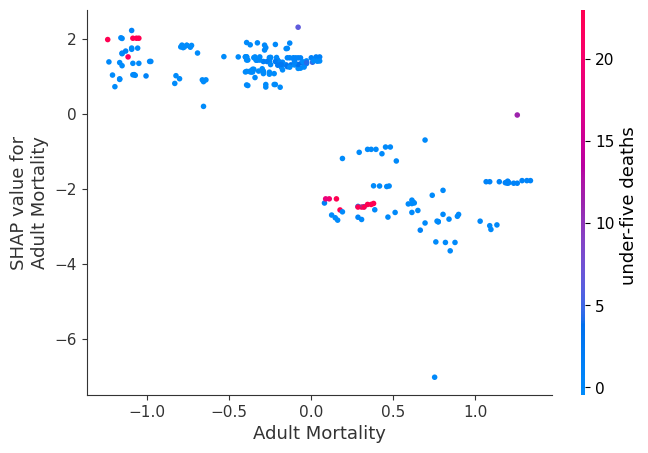

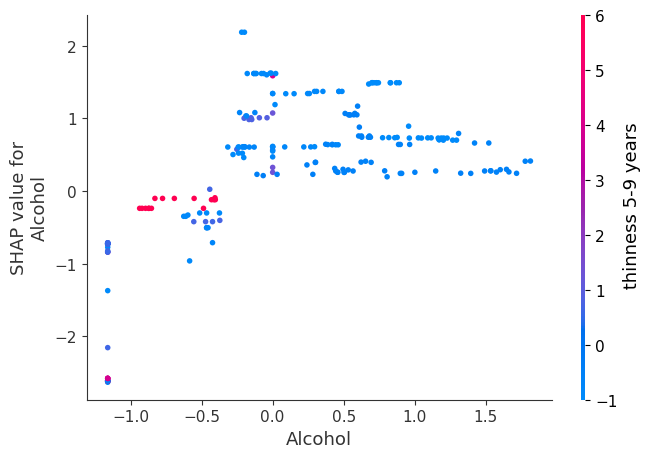

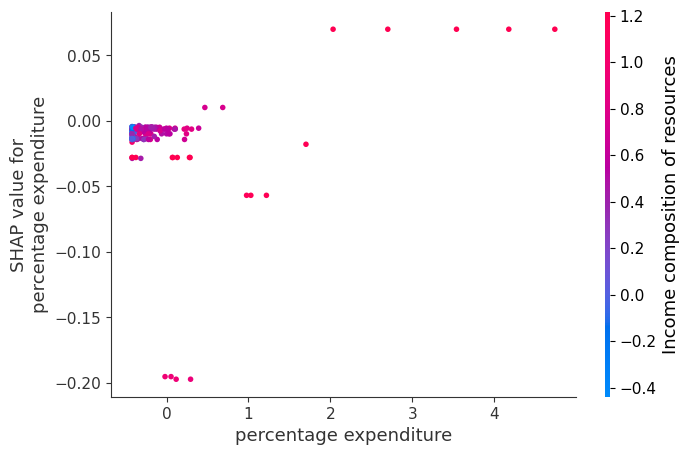

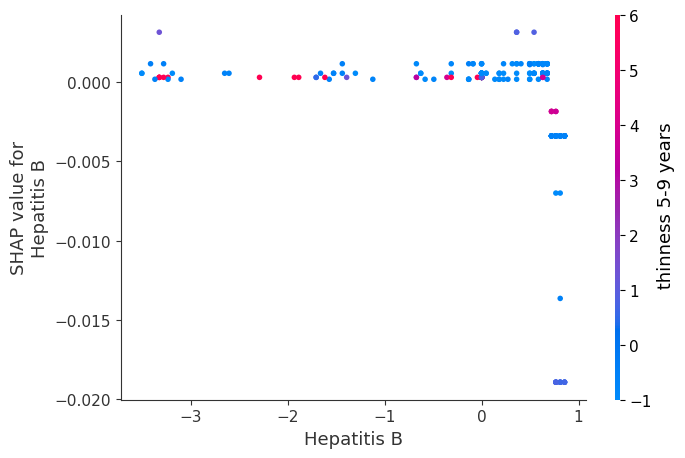

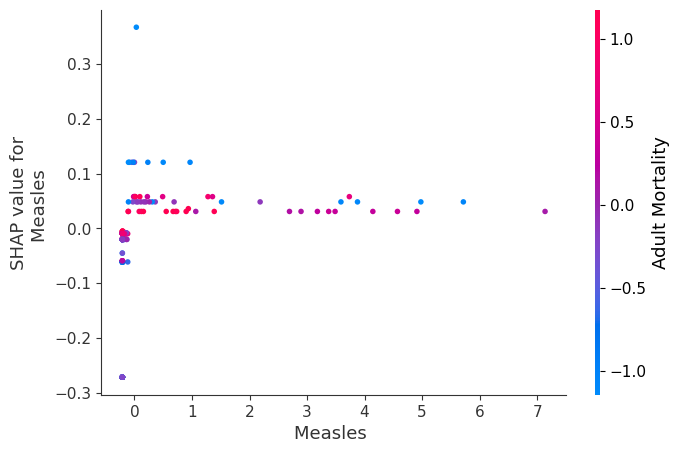

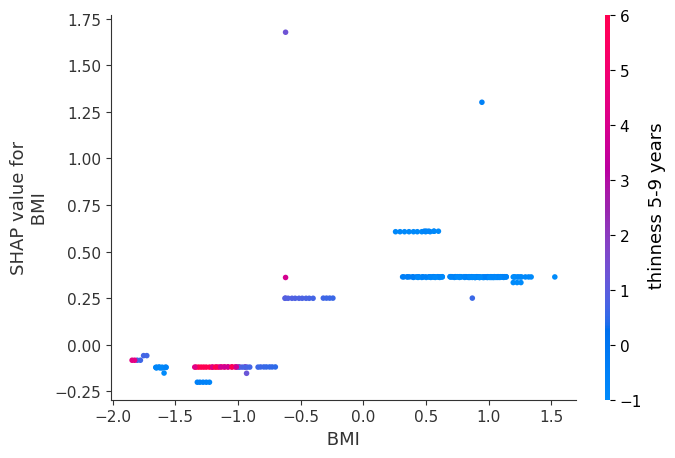

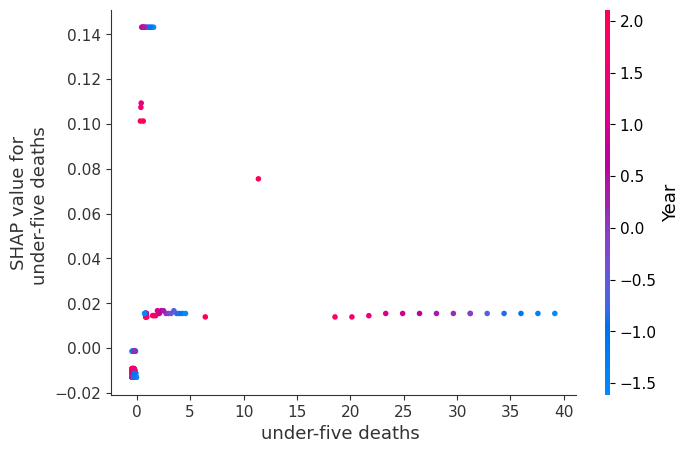

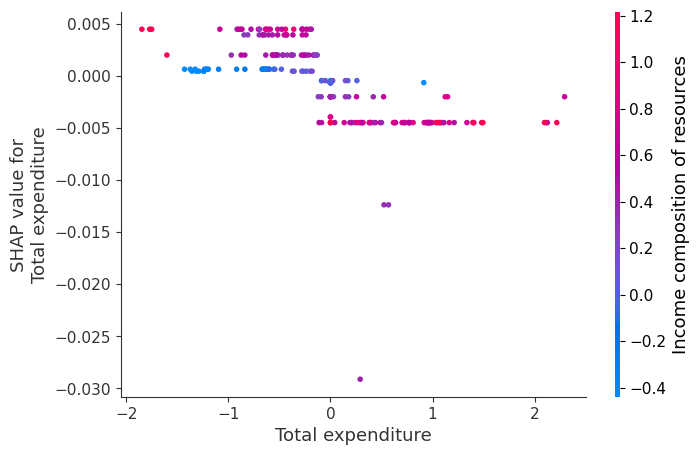

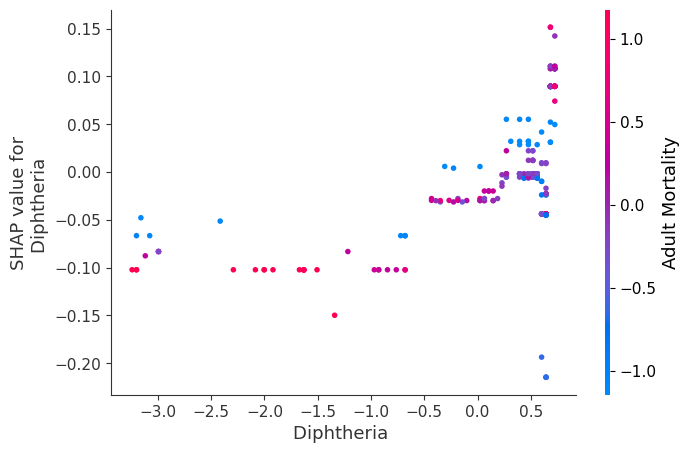

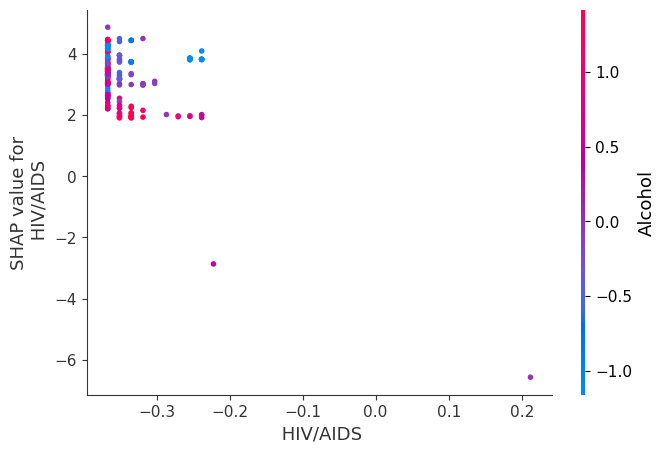

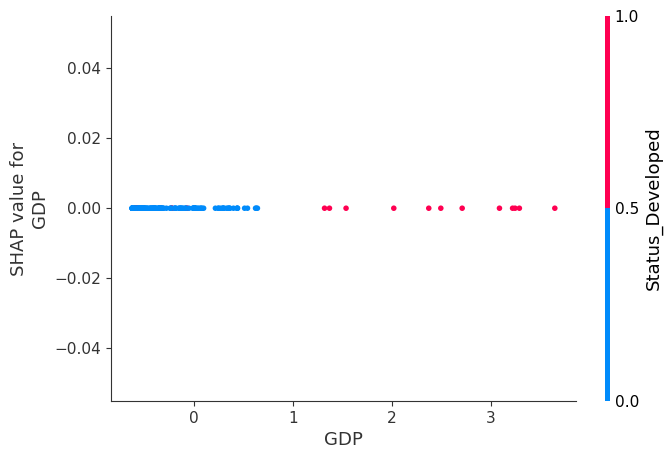

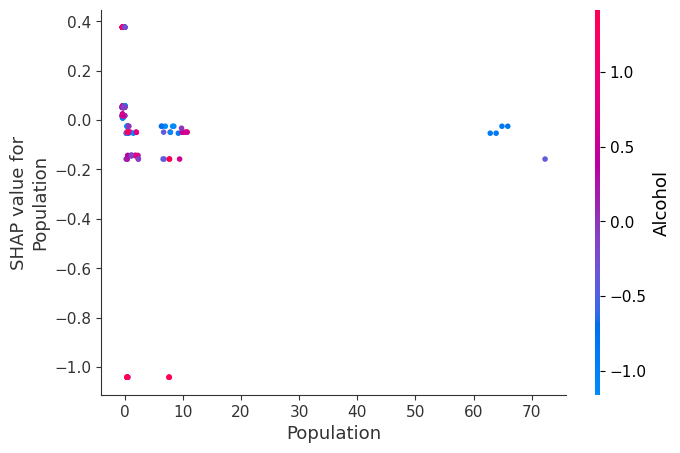

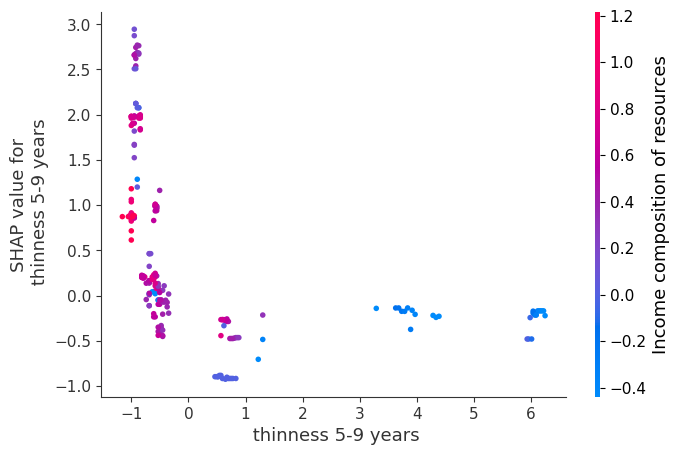

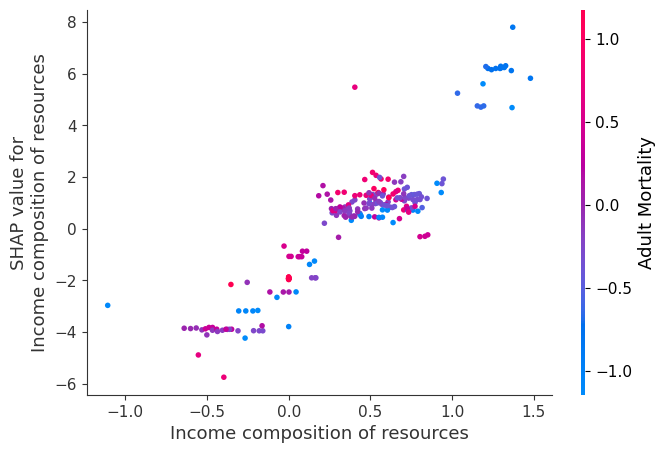

In [45]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, df_patt[X_train.columns])

### Time of execution

In [46]:
end = time.time()

In [47]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 5 seconds.
